In [1]:
import astropaint

from astropaint.lib import profile

import healpy as hp 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import rcParams
%config InlineBackend.figure_format = "retina"

rcParams["figure.figsize"] = (8,6)
rcParams["text.usetex"] = True
rcParams["font.size"] = 18
rcParams["font.family"] = "stix"
rcParams["figure.dpi"]= 150

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

# Catalog

The `Catalog` object reads/simulates a halo catalog. The initial catalog must contain the following columns: 

`x` , `y`, `z`, `v_x`, `v_y`, `v_z`, `M_200c`

Instantiating the class without any input will simulate a set of randomly distributed halos

In [2]:
catalog = astropaint.Catalog()

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


Extra parameters such as halo radius, distance, etc. can be build using the `.build_dataframe()` method which runs automatically when the catalog data are updated.  

The data frame is stored in the `.data` attribute. 

In [3]:
catalog.data.head()

x          y          z        v_x        v_y        v_z  \
0  -6.712578 -24.575891 -17.977121  55.740436 -33.958789  59.823045   
1  14.693200  -2.889205 -19.157228 -56.844858 -57.964751 -78.290082   
2  20.366821 -16.542395 -21.374351  70.626066   4.544960  -7.313273   
3  17.903440 -23.124715   9.812158  46.192223 -60.121850  26.603860   
4  22.801766  12.926656 -22.809252  51.155639 -51.798051 -35.643320   

         M_200c        D_c        lat         lon  ...    R_200c    c_200c  \
0  2.721825e+14  31.180282 -35.208543  254.723048  ...  1.366397  3.681820   
1  1.454392e+14  24.315366 -51.986446  348.875545  ...  1.108794  3.912586   
2  6.430457e+14  33.842593 -39.166889  320.915712  ...  1.819858  3.387229   
3  8.550054e+14  30.847432  18.547256  307.747479  ...  2.001151  3.294906   
4  7.041711e+14  34.745949 -41.030287   29.549537  ...  1.875785  3.357525   

    R_th_200c         rho_s       R_s        v_r       v_th       v_ph  \
0  150.650575  1.398915e+14  0.371120 -19.725307 -59.298460  62.718396   
1  156.763074  1.598409e+14  0.283391  34.219518  83.348049 -67.843309   
2  184.862050  1.167346e+14  0.537270  44.900826 -27.144319  48.055006   
3  223.015326  1.099952e+14  0.607347  80.341911  -1.105589  -0.280590   
4  185.589187  1.145397e+14  0.558681  37.698231  14.444006 -70.289386   

       v_lat      v_lon  
0  59.298460  62.718396  
1 -83.348049 -67.843309  
2  27.144319  48.055006  
3   1.105589  -0.280590  
4 -14.444006 -70.289386  

[5 rows x 23 columns]

In [4]:
catalog.data.columns

Index(['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'M_200c', 'D_c', 'lat', 'lon',
       'theta', 'phi', 'D_a', 'R_200c', 'c_200c', 'R_th_200c', 'rho_s', 'R_s',
       'v_r', 'v_th', 'v_ph', 'v_lat', 'v_lon'],
      dtype='object')

new random catalogs can be created using the `generate_random_shell()` or `generate_random_box()` methods to  distribute halos uniformly over a shell or in a cubic box. 

In [22]:
catalog.generate_random_shell(n_tot=1000,
                              shell_radius=30,
                              mass_min=1E14,
                              mass_max=1E15,)
                            

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [23]:
catalog.data.head()

x          y          z        v_x        v_y        v_z  \
0 -45.074942   0.948626 -21.618273  65.115806  83.137421 -46.149955   
1  13.756156  19.788361 -43.808549  31.554827 -50.259346  72.977824   
2   2.160957 -18.571933 -46.372552  92.503566  77.751383  68.984643   
3 -28.604156  39.993345  -9.073843 -30.801921   5.825553 -18.574412   
4  36.883704   0.013565 -33.757847  78.736946  95.560101  96.436227   

         M_200c   D_c        lat         lon  ...    R_200c    c_200c  \
0  4.951107e+13  50.0 -25.617772  178.794358  ...  0.774208  4.343681   
1  1.099117e+13  50.0 -61.183865   55.194365  ...  0.468783  5.026466   
2  3.219000e+16  50.0 -68.040902  276.636868  ...  6.707035  2.317369   
3  1.670746e+16  50.0 -10.455795  125.573218  ...  5.390061  2.469572   
4  1.480205e+16  50.0 -42.466338    0.021072  ...  5.176833  2.498750   

    R_th_200c         rho_s       R_s        v_r        v_th        v_ph  \
0   53.230622  2.015563e+14  0.178238 -37.170850   69.004607  -84.489109   
1   32.231120  2.801751e+14  0.093263 -75.150590  -14.798861  -54.597200   
2  461.141739  5.276432e+13  2.894246 -88.861823   35.915338  100.869882   
3  370.593312  6.006312e+13  2.182589  25.651752   14.154241   21.664471   
4  355.932822  6.152709e+13  2.071769  -7.001458 -124.322029   95.531137   

        v_lat       v_lon  
0  -69.004607  -84.489109  
1   14.798861  -54.597200  
2  -35.915338  100.869882  
3  -14.154241   21.664471  
4  124.322029   95.531137  

[5 rows x 23 columns]

Let's checkout the 2D projection of the catalog in the $x$-$y$ plane.

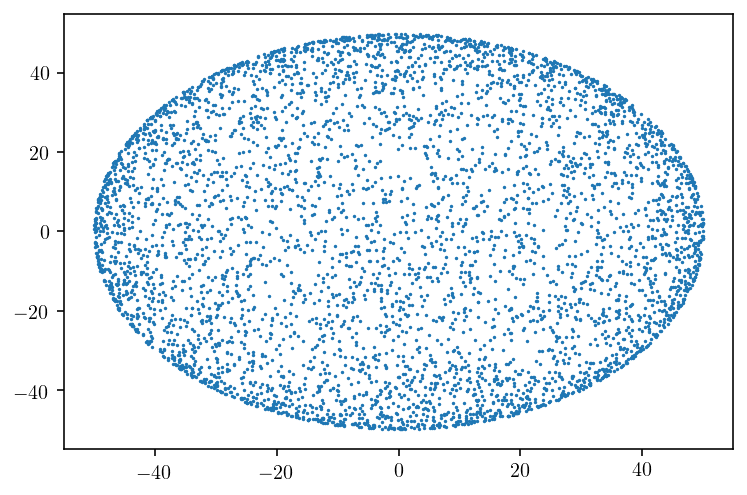

In [24]:
plt.scatter(catalog.data.x, catalog.data.y, s=0.5)

Great! Now let's put these halos on a canvas.

# Canvas 

The `Canvas` object locates the halo centers and extents on a healpy map. We can initialize it by feeding in a `Catalog` object and an `nside` for the map. 

In [25]:
canvas = astropaint.Canvas(catalog,
                           nside = 256,
                           R_times=1,
                           analyze=False)

Let's check out the locations of the halos with a scatter plot

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


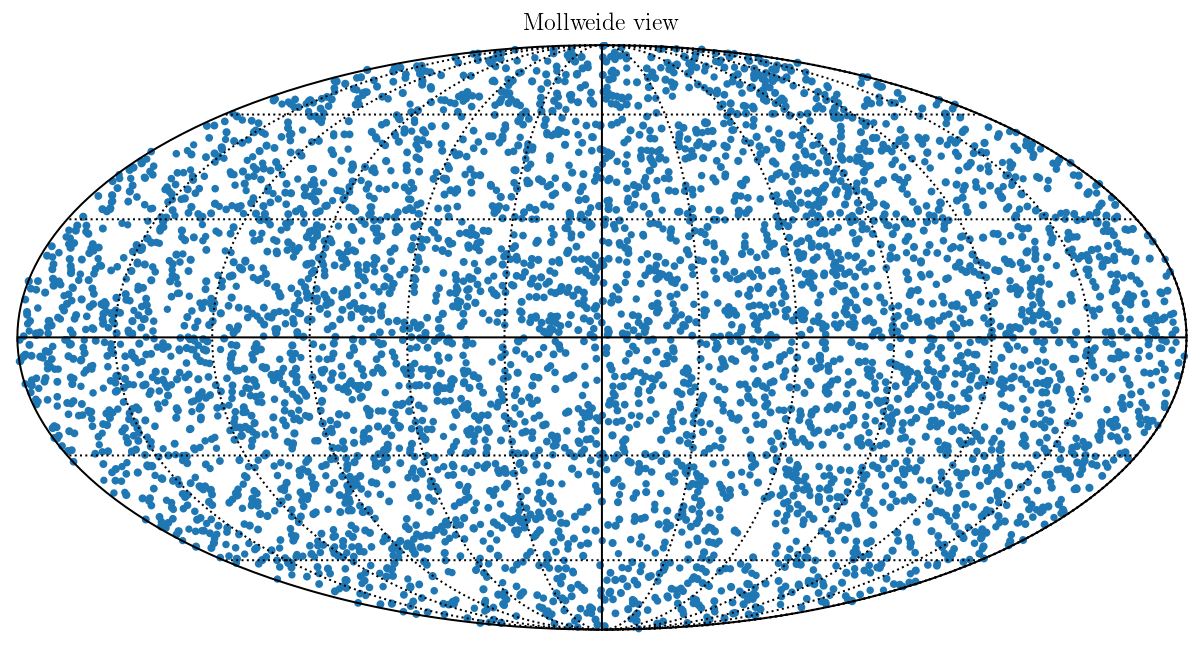

In [26]:
canvas.show_halo_centers("mollview",
                        marker='.',
                        )

and in cartesian projection

0.0 135.5224878140701 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


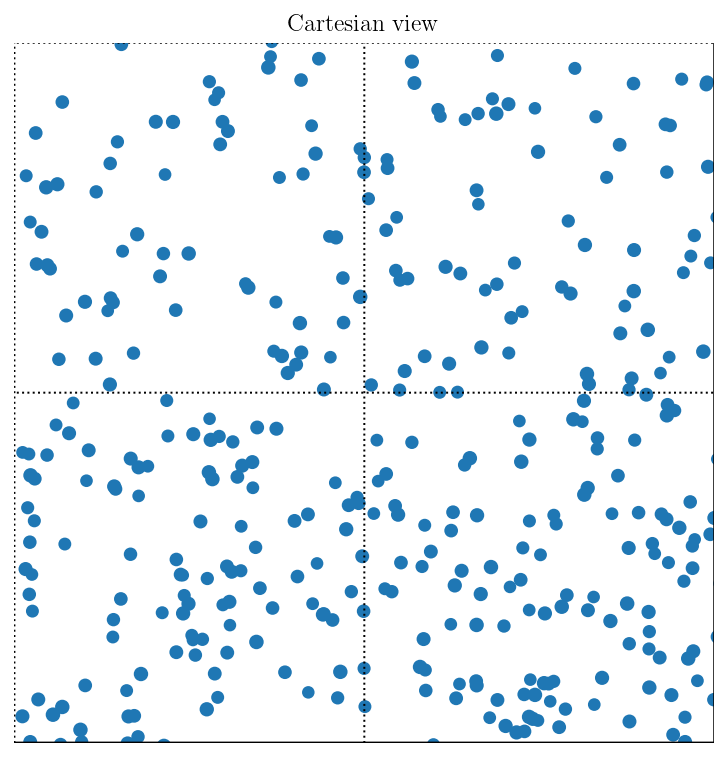

In [27]:
canvas.show_halo_centers("cartview",
                        lonra=[0,60],
                        latra=[0,60],
                        )

The canvas provides methods for carving discs around halo centers. These methods can be accessed through the `discs` inner class. The radii of the discs are set by the parameter `R_times` passed to the canvas upon instantiation. 

Let's check out the discs

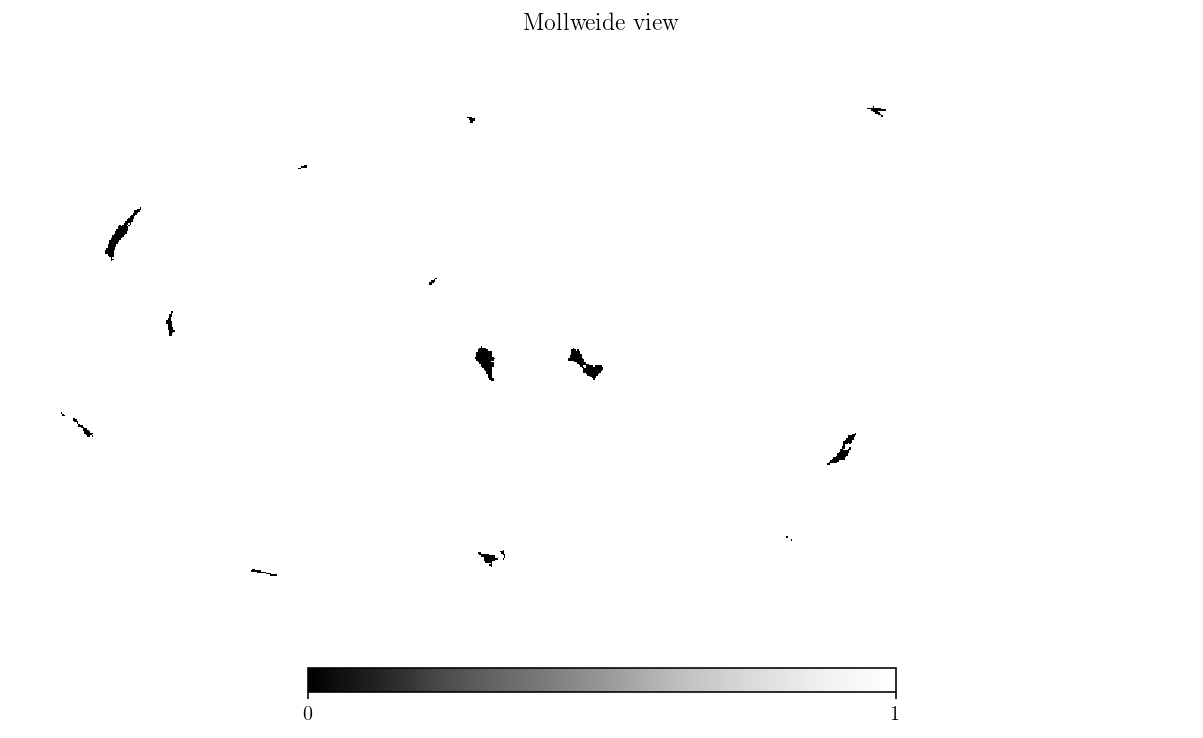

In [28]:
canvas.cmap = cm.Greys_r

canvas.show_discs()

# Painter

The `Painter` object paints a signal on top of the canvas according to an input template

In [29]:
painter = astropaint.Painter(template=profile.solid_sphere_proj)

The template 'solid_sphere_proj' takes in the following arguments:
['r', 'M_200c', 'R_200c']



In [30]:
# change the color map to RdYlBu
canvas.cmap = cm.RdYlBu_r

If the canvas has been painted on previously, it can be cleaned using `.clean()`

In [31]:
canvas.clean()

The painter paints the signal on the canvas using the `.spray()` method

In [32]:
painter.spray(canvas)

2019-12-12 16:12:40,901	INFO resource_spec.py:205 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.28 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['R_200c', 'M_200c'], dtype='object')
Spraying in parallel with ray...
n_cpus = 4


2019-12-12 16:12:41,298	WARNING worker.py:348 -- WARNING: Falling back to serializing objects of type <class 'method'> by using pickle. This may be inefficient.


spraying in batch mode
Your artwork is fininshed. Check it out with Canvas.show_map()


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


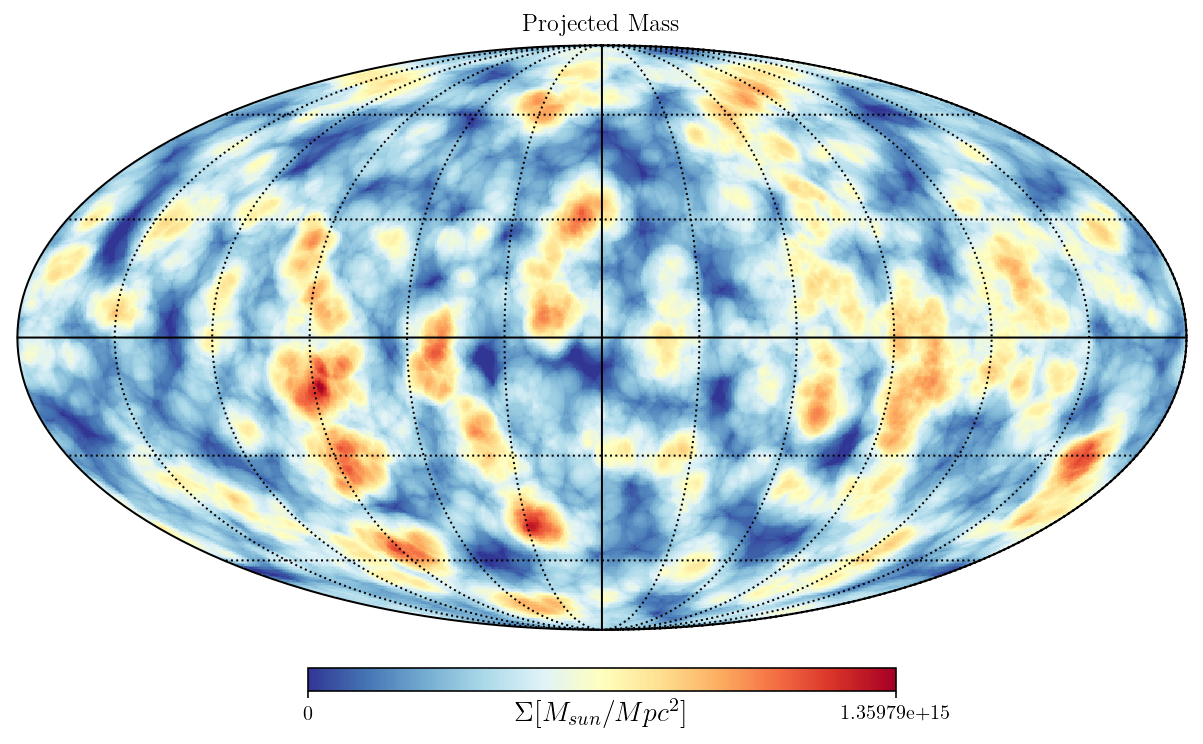

In [33]:
canvas.show_map(projection="mollview",
                title="Projected Mass",
                unit="$\Sigma [M_{sun}/Mpc^2$]")
hp.graticule()

33.59037789072914 116.40962210927087 -27.870395409510863 57.87039540951086
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


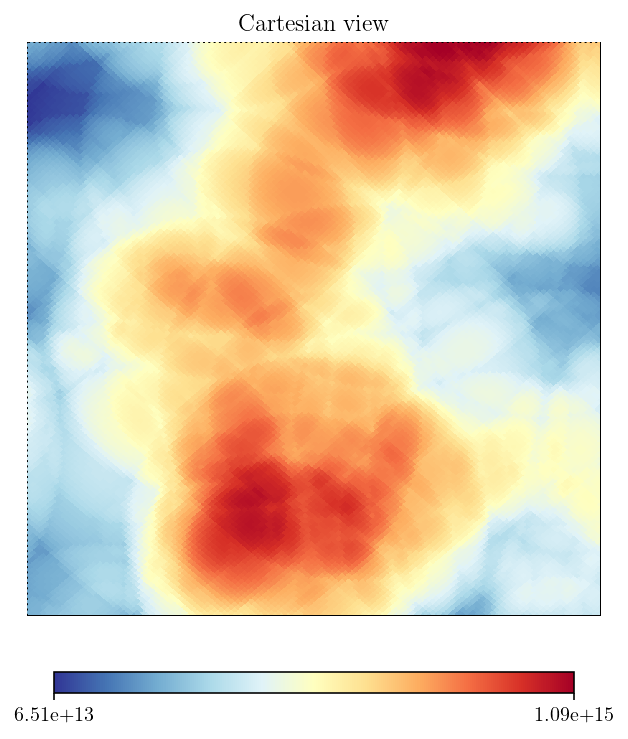

In [34]:
canvas.show_map(projection="cartview",
               lonra=[0,30],
               latra=[0,30])
hp.graticule()


The painter can take any arbitrary function that takes `r` as the first argument. To demonstrate this, let's define an absurd radial profile that oscilates as `sin(5*r/R_200c)` and is proportional to `M_200c`! 

In [18]:
def crazy_profile(r, R_200c, M_200c):
    
    return np.sin(4*r/R_200c)*M_200c

In [19]:
painter = astropaint.Painter(crazy_profile)

The template 'crazy_profile' takes in the following arguments:
['r', 'R_200c', 'M_200c']



2019-12-12 16:11:34,759	INFO resource_spec.py:205 -- Starting Ray with 4.59 GiB memory available for workers and up to 2.3 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['R_200c', 'M_200c'], dtype='object')
Spraying in parallel with ray...
n_cpus = 4


2019-12-12 16:11:35,135	WARNING worker.py:348 -- WARNING: Falling back to serializing objects of type <class 'method'> by using pickle. This may be inefficient.


spraying in batch mode
Your artwork is fininshed. Check it out with Canvas.show_map()


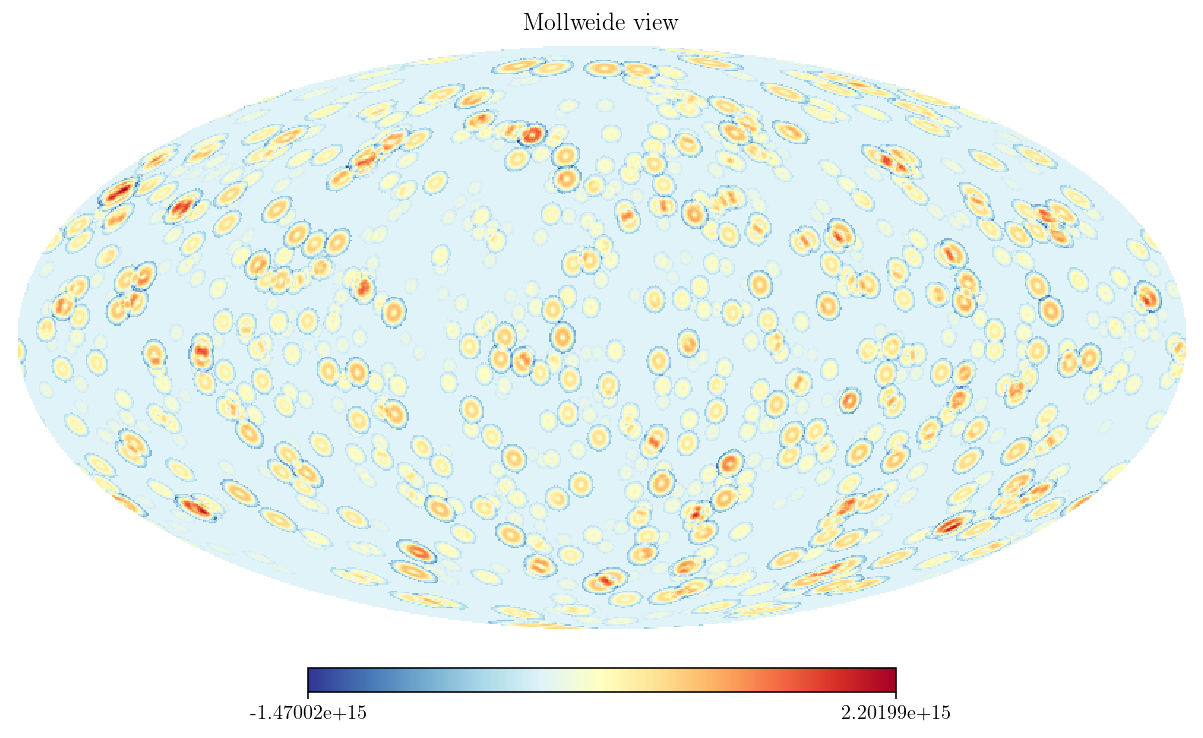

In [20]:
canvas.clean()
painter.spray(canvas)
canvas.show_map()

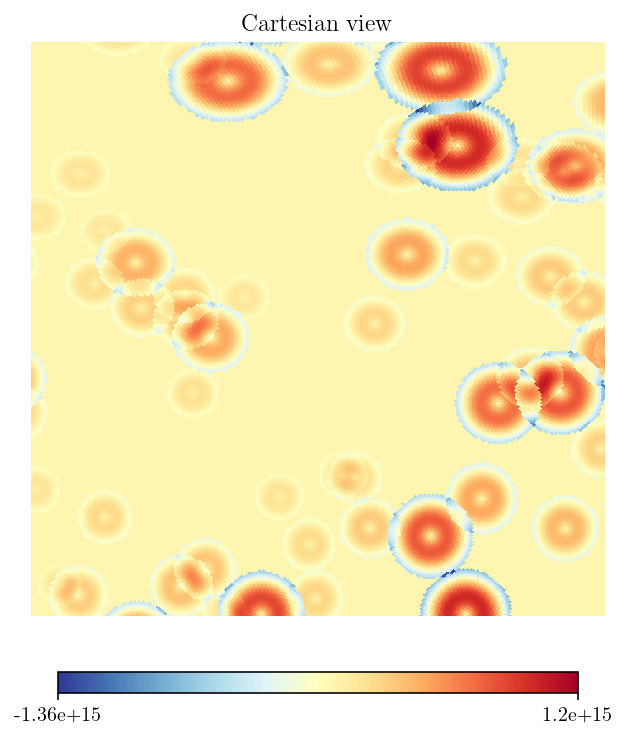

In [21]:
canvas.show_map("cartesian",
               lonra=[0,50],
               latra=[0,50])

Notice that we didn't have to define `R_200c` or `M_200c`! The painter looks up the function arguments in the catalog and uses them if they exist. 

# kinetic Sunyaev Zeldovich (in progress...)

Now let's try to make a more realistic map. We will generate a larger catalog and then paint the kSZ signal over the halos. 

In [37]:
catalog = astropaint.Catalog()
catalog.generate_random_box(n_tot=100000,
                                           box_size=30,
                                           mass_min=1E14,
                                           mass_max=1E15,
                                           put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [38]:
canvas = astropaint.Canvas(catalog,
                           nside=512)

In [39]:
kSZ_painter = astropaint.Painter(template=profile.kSZ_T_NFW)
kSZ_painter.spray(canvas)

2019-12-12 16:14:16,272	INFO resource_spec.py:205 -- Starting Ray with 4.54 GiB memory available for workers and up to 2.28 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


The template 'kSZ_T_NFW' takes in the following arguments:
['r', 'rho_s', 'R_s', 'v_r']
and the following keyword-only arguments:
['T_cmb']
Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['R_s', 'rho_s', 'v_r'], dtype='object')
Spraying in parallel with ray...
n_cpus = 4


2019-12-12 16:14:16,827	WARNING worker.py:348 -- WARNING: Falling back to serializing objects of type <class 'method'> by using pickle. This may be inefficient.


spraying in batch mode
(pid=37870) /Users/siavashyasini/Dropbox/Cosmology/Projects/2019/AstroPaint/astropaint/astropaint.py:1491: ComplexWarning: Casting complex values to real discards the imaginary part
(pid=37870)   template(**spray_dict))
(pid=37872) /Users/siavashyasini/Dropbox/Cosmology/Projects/2019/AstroPaint/astropaint/astropaint.py:1491: ComplexWarning: Casting complex values to real discards the imaginary part
(pid=37872)   template(**spray_dict))
(pid=37871) /Users/siavashyasini/Dropbox/Cosmology/Projects/2019/AstroPaint/astropaint/astropaint.py:1491: ComplexWarning: Casting complex values to real discards the imaginary part
(pid=37871)   template(**spray_dict))
(pid=37869) /Users/siavashyasini/Dropbox/Cosmology/Projects/2019/AstroPaint/astropaint/astropaint.py:1491: ComplexWarning: Casting complex values to real discards the imaginary part
(pid=37869)   template(**spray_dict))
Your artwork is fininshed. Check it out with Canvas.show_map()


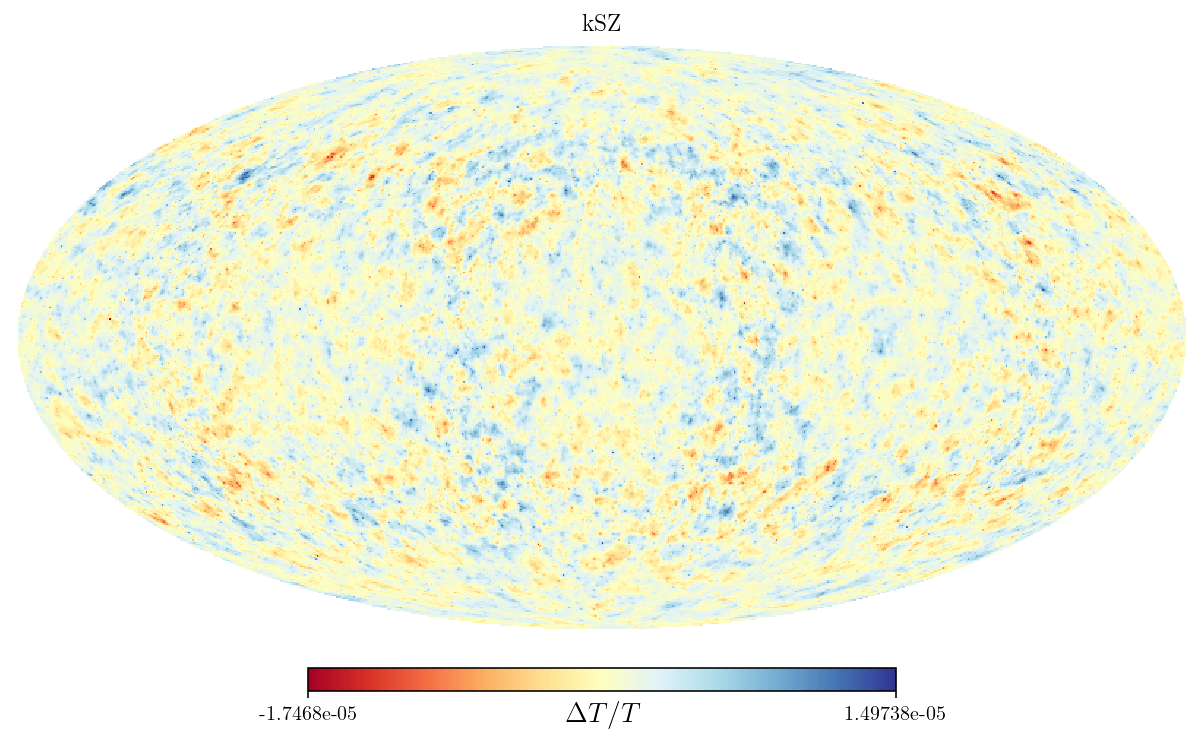

In [40]:
canvas.cmap = cm.RdYlBu
canvas.show_map(title="kSZ",
                unit="$\Delta T/T$")

In [8]:
kSZ_painter = astropaint.Painter(template=profile.kSZ_T_NFW)
kSZ_painter.spray(canvas)

The template 'kSZ_T_NFW' takes in the following arguments:
['r', 'rho_s', 'R_s', 'v_r']
and the following keyword-only arguments:
['T_cmb']
Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['rho_s', 'R_s', 'v_r'], dtype='object')
Your artwork is fininshed. Check it out with Canvas.show_map()


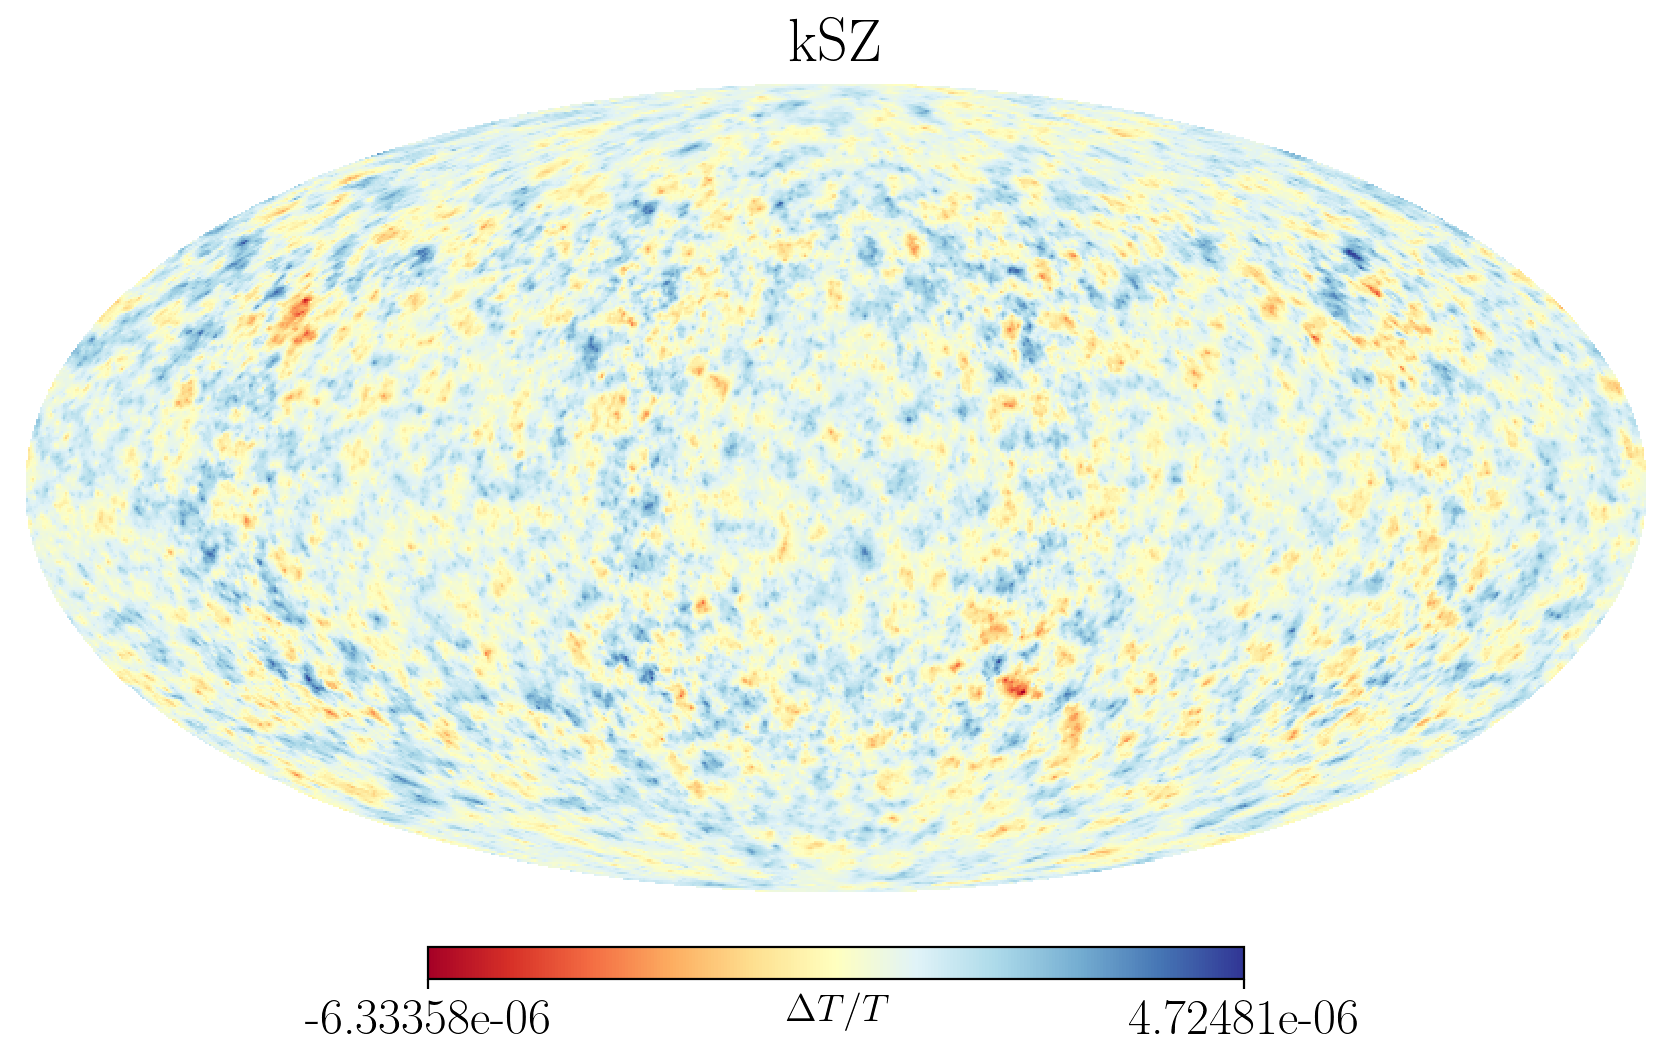

In [17]:
canvas.cmap = cm.RdYlBu
canvas.show_map(title="kSZ",
                unit="$\Delta T/T$")

# Birkinshaw-Gull (in progress...)

In [65]:
catalog.data = catalog.generate_random_box(n_tot=10000,
                                           box_size=200,
                                           mass_min=1E13,
                                           mass_max=1E15,
                                           put_on_shell=True)



generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


You can also paint signals around the halos that are not axially symmetric. The canvas can not only find the distance from the halo center to each pixel, but also the unit vector `r_hat` pointing to each pixel. 

In [66]:
canvas = astropaint.Canvas(catalog,
                          nside=512,
                          R_times=20)


Done! You can now get the center pixels using Canvas.centers_indx.
Done! You can now get the angular position of the discs using Canvas.centers_ang.
Done! You can now get the discs using Canvas.discs_indx.
Done! You can now get the angular position of the discs using Canvas.discs_ang.


In [67]:
canvas.find_discs_2center_vec()

Done! You can now get the vectots pointing to the disc pixels using Canvas.discs_vec.
Done! You can now get the center pixel vectors using Canvas.centers_vec.


In [68]:
painter = astropaint.Painter(profile.BG_NFW)


The template 'BG_NFW' takes in the following arguments:
['r', 'r_hat', 'c_200c', 'R_200c', 'M_200c', 'theta', 'phi', 'v_th', 'v_ph']
and the following keyword-only arguments:
['T_cmb']


In [69]:
painter.spray(canvas)

Painting the canvas...
No template_kwargs provided
The following parameters were not found in the canvas.catalog.data
['r_hat']
Make sure you pass them as kwargs (key=value), dictionary (**dict), or Pandas DataFrame (**df) in the .spray method. Check the spray docstring(.spray.__doc__) for examples. 
spray_df.columns = Index(['v_ph', 'M_200c', 'R_200c', 'phi', 'v_th', 'c_200c', 'theta'], dtype='object')
Your artwork is fininshed. Check it out with Canvas.show_map()


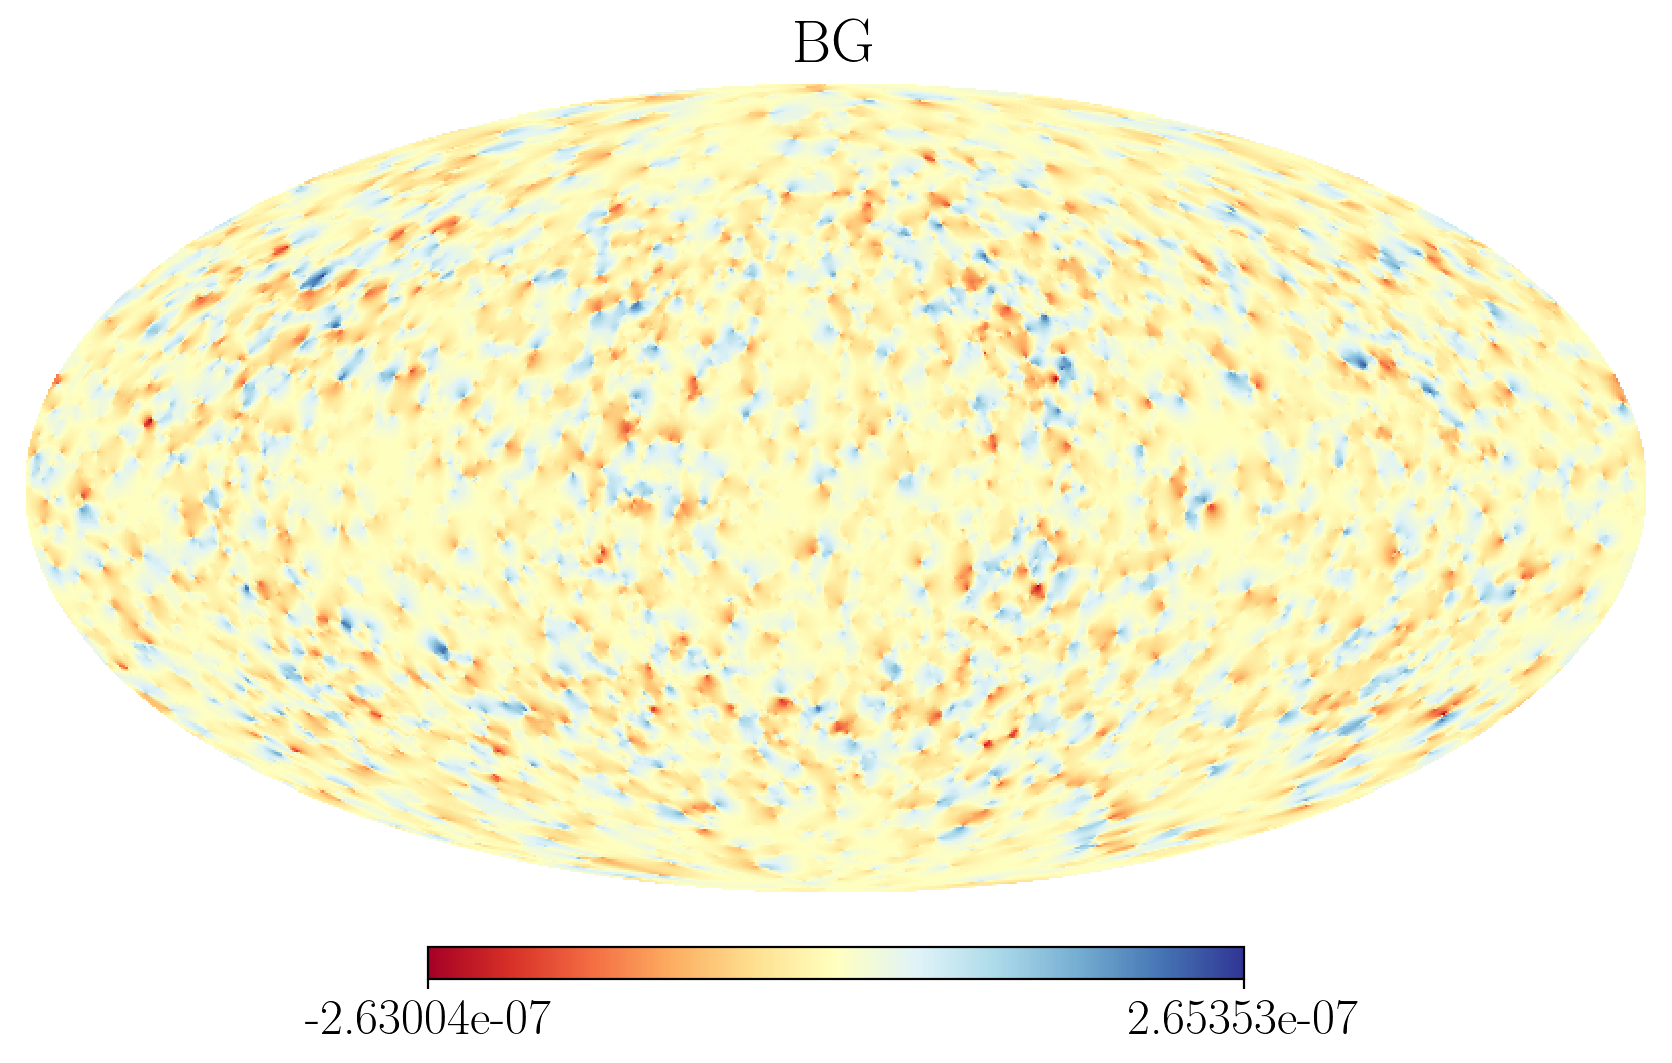

In [72]:
canvas.cmap = cm.RdYlBu
canvas.show_map(title="BG")

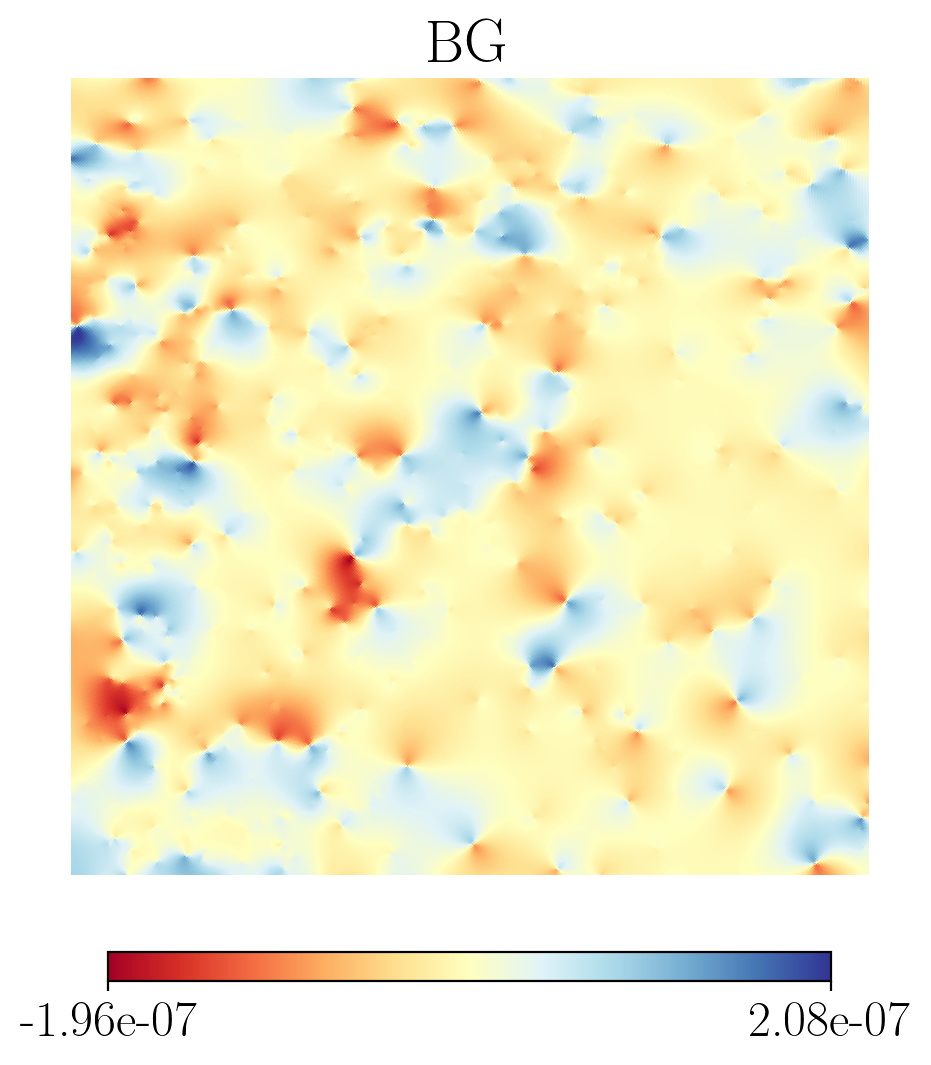

In [73]:

canvas.show_map("cartesian",
                title="BG",
               lonra=[0,50],
               latra=[0,50])